<a href="https://colab.research.google.com/github/Kat-ies/Coursework/blob/new_structure/notebooks/Neural_network_face_classificaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 2**
***Classification problem solution using neural networks.***

In [ ]:
!git clone https://github.com/Kat-ies/Coursework.git
%cd Coursework/src
%run for_google_drive.py

# Fully connected neural network

In the Part 2 the subject of the our experiments will be neural networks. We want to compare how  machine learning methods and neural networks solve  the problem of classifying faces in an image. Which one is better?

To do this, we will take all the types of features from the [Part 1](https://github.com/Kat-ies/Coursework/blob/master/notebooks/ML_methods_face_classification.ipynb) and use for comparison such values as  accuracy, training time and prediction time and the amount of memory for the trained models.

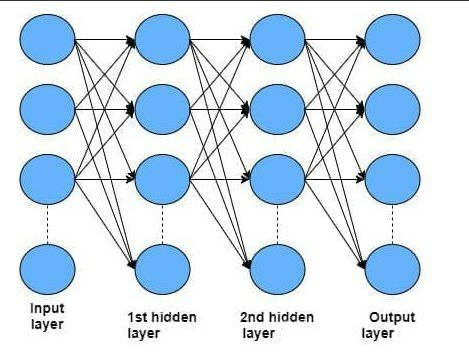  

To build the network architecture, we need to define the number of layers and neurons, as well as define the loss function, optimization function, and so on... The selection of parameters was empirically. 
  
   
**P.S. Fully connected network will be described as $a / x_{1} / ... / x_{n} / b$, where $a$, $b$ are the number of neurons in the input layer and output layer, and $x_{i}$ is the number of neurons in the hidden layers. The results of experiments for finding params can be found here: https://docs.google.com/spreadsheets/d/1Qvn6k-yyfEuRum9eUxRetVPQpU6imFPau3qaQrLEOYc/edit?usp=sharing**  
  
  
Let's test fully connected neural network with the following params:



> General scheme:   $len(features)/$$70/35/2$  
> Activation function:  $sigmoid$  
> Loss function:  $CrossEntropyLoss$  
> Optimazer:  $Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_{decay}=0, amsgrad=False)$





 fully_connected  network
Feature type:  hf
cpu


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Early stopping! No changes in last 100 epoch for validation samples! Epoch:  6438
Last validation accuracy:  0.8281276475571873
Last train accuracy:  0.9079115830697394
Loss:  0.4056728482246399

 fully_connected  network
Feature type:  mf
cpu
Early stopping! No changes in last 100 epoch for validation samples! Epoch:  17267
Last validation accuracy:  0.8421914713357809
Last train accuracy:  0.9185118240698901
Loss:  0.394724041223526

 fully_connected  network
Feature type:  mf_pca
cpu
Early stopping! No changes in last 100 epoch for validation samples! Epoch:  20098
Last validation accuracy:  0.8299915278170008
Last train accuracy:  0.941086760054225
Loss:  0.3721745014190674

 fully_connected  network
Feature type:  hf
cuda:0
Early stopping! No changes in last 100 epoch for validation samples! Epoch:  6925
Last validation accuracy:  0.8258119175374188
Last train accuracy:  0.9088341617713511
Loss:  0.40470224618911743

 fully_connected  network
Feature type:  mf
cuda:0
Early stoppin

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


Early stopping! No changes in last 100 epoch for validation samples! Epoch:  22156
Last validation accuracy:  0.8283535724371647
Last train accuracy:  0.9395240247025154
Loss:  0.373734712600708


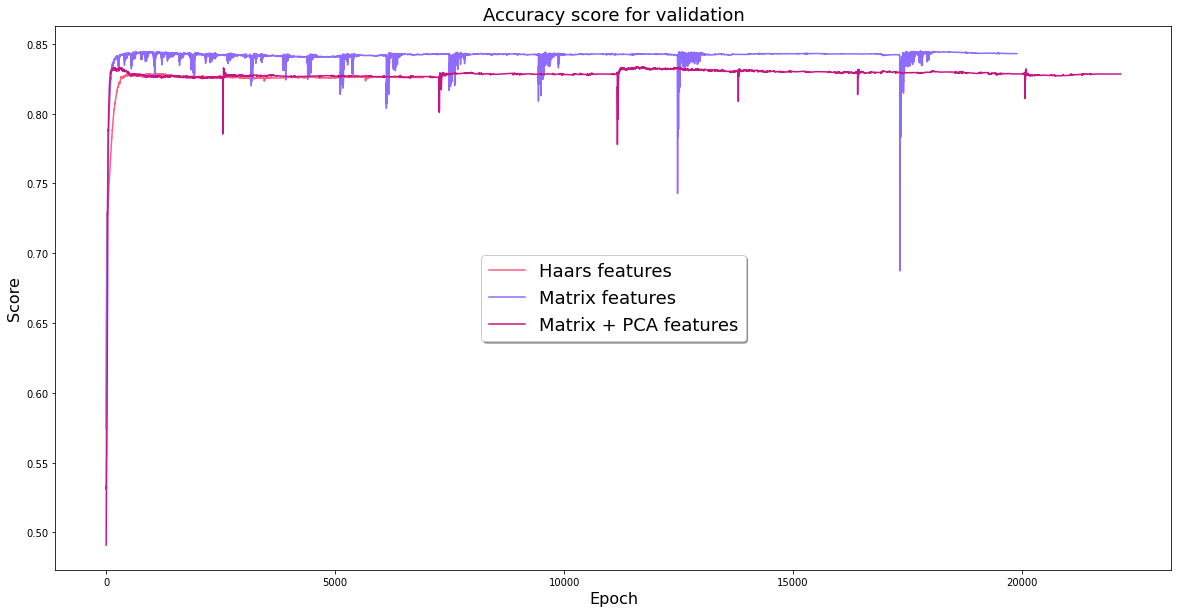

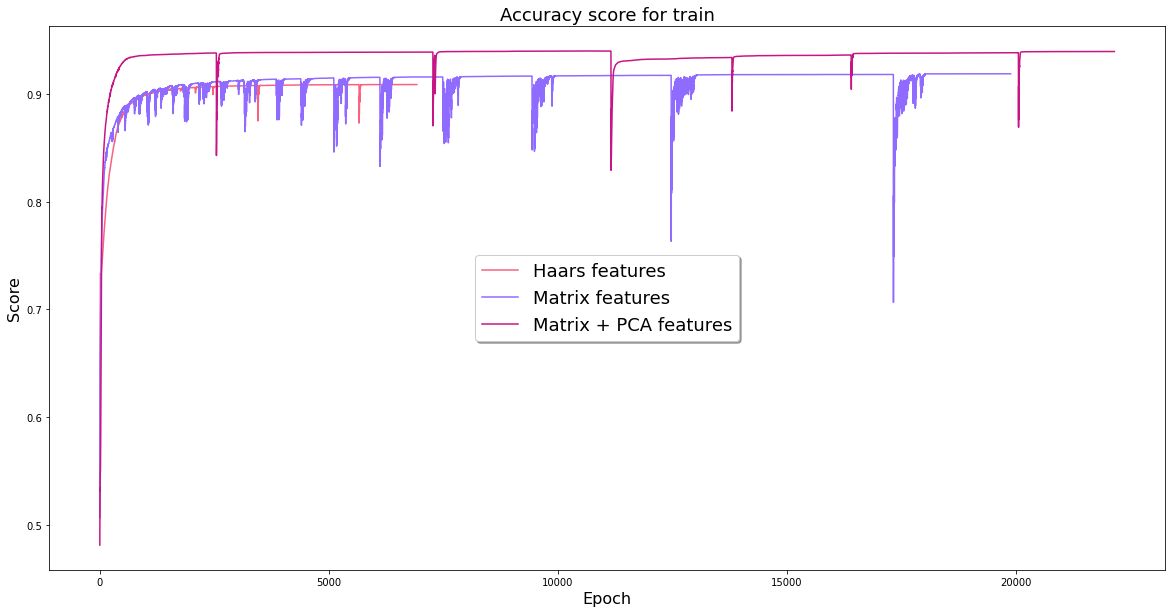

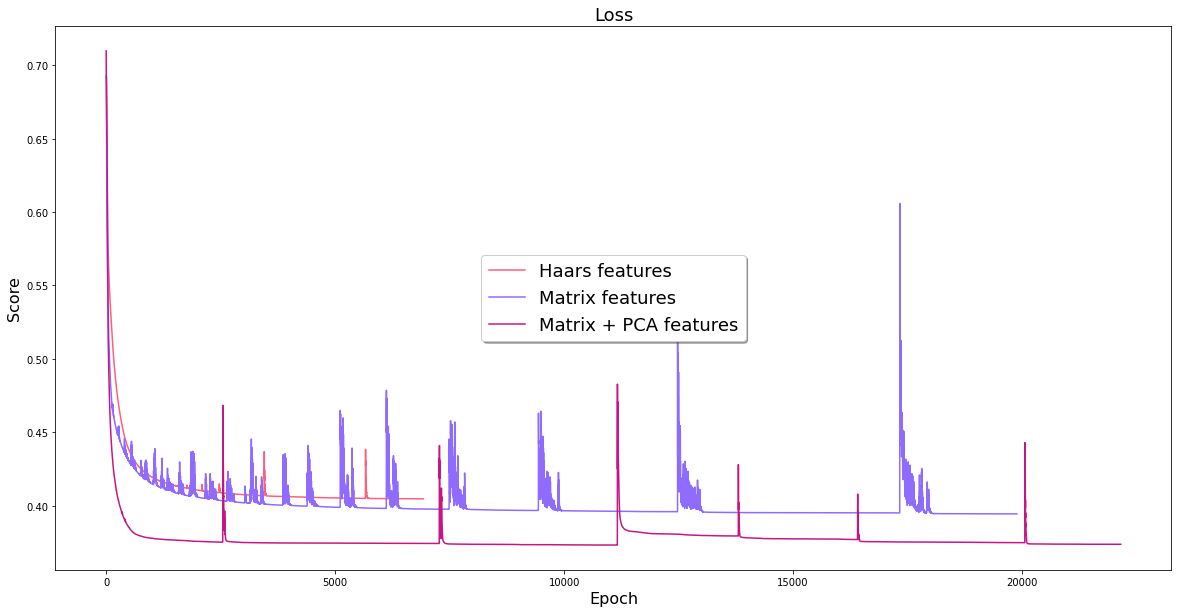

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [3]:
from nn_run import *

run_fully_connected_network()

# Convolutional neural network
 

Before we start the description of the network, it should be noted that we will only work with the original matrix image, because there is no point in "pulling" vectors of the size $1*n$.


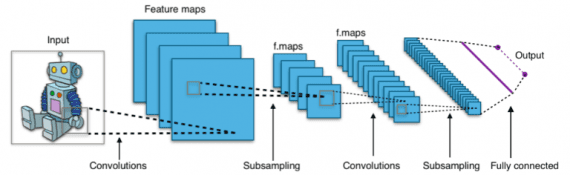


Let's test convolutional neural network with the following params:

> General scheme:
> * 1 Layer: convolution + pooling (then add the output dimensions and so on)
> * 2 Layer: convolution + pooling (-/\/\-)
> * Using Dropout for better learning
> * Linear fully connected layers: $4*64/32/2$


> Activation function: $sigmoid$    
> Loss function: $CrossEntropyLoss$   
> Optimazer: $Adam (net.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_{decay}=0, amsgrad=False)$  




In [ ]:
from nn_run import *
run_convolution_network()


 convolution  network
Feature type:  mf
cpu


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


# Examples
Here there are some examples after prediction.

In [1]:
get_haars_net_df()

NameError: ignored

In [2]:
get_matrix_net_df()

NameError: ignored

# Results

Let's calculate 'accuracy' for two models.  

P.S. In theory the processor type only affects performance. But in practice it's not true, but the accuracy losses are very small, so they can be ignored. We will calculate `accuracy` for only gpu.

In [ ]:
calc_accuracy()

In [ ]:
#interesting fact: 1450 s = 0.4 h, 13393 s = 3.7 h, 2636 s = 0.7 h
get_net_time_df()

# Additional experiment 

If we see the training graphics for a fully connected neural network, we will see interesting segments with bad results. 

On closer inspection, we can notice that the graphic for the accuracy results and the graphic of the loss function are symmetric. When the value of the loss function increases during training, the accuracy of the training and validation samples decreases. However, one type of feature doesn't have such great "fails".

The reason for this may be the fact that these features are created using the the principal component method, so they are the most informative of all the originally proposed features. At the same time, no filtering was performed for other features, it means that there may be information that worsen the results.

As a result, there is a chance that the surface on which the maximum point is searched for accuracy on the validation sample is very relief, and "bad features" form not just points of local extremes, they can form large regions. And when we get to such areas, it takes time to get out of them.

Additional research is an attempt to improve the graphics. One possible solution is to change learning rate from 0.001 to 0.0001 to decrease the chance of falling to "bad" areas.

[More ideas and their results](https://drive.google.com/file/d/1qUejGxBbtNj276WXc5XP9mcr6CCXesvl/view?usp=sharing)

In [ ]:
run_fully_connected_network(experiment_number=2)

In [2]:
calc_accuracy(exp_num=2)

,features,fully_con_net_gpu
1,Haars features,0.823604
2,Matrix features,0.836440
3,Matrix + PCA features,0.822799


# GPU info
A small part for curious people :)  
Here there is an information of gpu that google offers to use.

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Thu Nov 26 02:34:14 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    30W /  70W |    953MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------